In [96]:
#If you need to install in modules in jupyter notebook 
%pip install scikit-learn
%pip install pandas
%pip install matplotlib 
%pip install seaborn 
%pip install graphviz
%pip install scikit-plot   
%pip install statsmodels   


#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime # Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LinearRegression
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packa

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [242]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

In [468]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv') 

In [469]:
from sklearn import preprocessing

#Data Cleaning
df = df[~df.Name.str.contains('Mega')] #removed pokemon with "Mega" in it
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation"]) #Removed columns with names

#normalization
# X = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df=pd.DataFrame(x_scaled, columns=df.columns)


In [470]:
 #Splitting dataset to x and y
y = df.Attack
X = df[['Defense','HP','Sp. Atk','Sp. Def','Speed']]
# X = df.HP

# MultiVariate  Regression

In [471]:
 from sklearn.linear_model import LinearRegression

In [429]:
def MultiVariateLinearRegression(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
  regr = LinearRegression()
  regr.fit(X, y)
  print('Intercept: \n', regr.intercept_)
  print('Coefficients: \n', regr.coef_)
  kf = KFold(n_splits=10, random_state=None, shuffle=True)
  kf.get_n_splits(X)
  for train_index, test_index in kf.split(X):
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_train)
  print("coefficient of determination score",r2_score(y_train,y_pred))
  print("mean squared error",mean_squared_error(y_train,y_pred,squared =False))


In [430]:
MultiVariateLinearRegression(X,y)

Intercept: 
 8.210680550338893
Coefficients: 
 [ 0.44614817  0.36994363  0.18231691 -0.31638889  0.29630742]
coefficient of determination score 0.4365030132081522
mean squared error 22.01083432325809


In [477]:
X = X.HP

In [478]:
 print(X)

0      45 
1      60 
2      80 
4      39 
5      58 
       .. 
794    108
795    50 
797    80 
798    80 
799    80 
Name: HP, Length: 751, dtype: int64


# Gradient Descent Mini Batch

In [479]:
print(X)

0      45 
1      60 
2      80 
4      39 
5      58 
       .. 
794    108
795    50 
797    80 
798    80 
799    80 
Name: HP, Length: 751, dtype: int64


In [494]:
X_b = np.c_[np.ones((751, 1)), X]  # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[41.85738349  0.49688982]


In [495]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([591, 494, 248, 409, 336,\n            ...\n            339, 387, 413,  87,  71],\n           dtype='int64', length=48). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [497]:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([41.85738349, 42.85116314])

In [500]:
eta = 0.1
n_iterations = 10
m = 100
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))
print (theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

[0.59374218 1.21281507]


array([2.91776703e+36, 2.28923285e+38])

In [502]:
X_b.dot(theta)

array([1.03044656e+40, 1.37383149e+40, 1.83167806e+40, 8.93092588e+39,
       1.32804683e+40, 1.78589340e+40, 1.00755423e+40, 1.35093916e+40,
       1.80878573e+40, 1.03044656e+40, 1.14490820e+40, 1.37383149e+40,
       9.15984917e+39, 1.03044656e+40, 1.48829313e+40, 9.15984917e+39,
       1.44250847e+40, 1.90035504e+40, 6.87061632e+39, 1.25936984e+40,
       9.15984917e+39, 1.48829313e+40, 8.01523274e+39, 1.37383149e+40,
       8.01523274e+39, 1.37383149e+40, 1.14490820e+40, 1.71721641e+40,
       1.25936984e+40, 1.60275477e+40, 2.06060134e+40, 1.05333889e+40,
       1.39672382e+40, 1.85457039e+40, 1.60275477e+40, 2.17506298e+40,
       8.70200260e+39, 1.67143176e+40, 2.63290956e+40, 3.20521777e+40,
       9.15984917e+39, 1.71721641e+40, 1.03044656e+40, 1.37383149e+40,
       1.71721641e+40, 8.01523274e+39, 1.37383149e+40, 1.37383149e+40,
       1.60275477e+40, 2.29215062e+39, 8.01523274e+39, 9.15984917e+39,
       1.48829313e+40, 1.14490820e+40, 1.83167806e+40, 9.15984917e+39,
      

In [507]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 240, 0, 350])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

<ipython-input-507-3ecd99aff936>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients
<ipython-input-507-3ecd99aff936>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients
<ipython-input-507-3ecd99aff936>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


Saving figure gradient_descent_plot


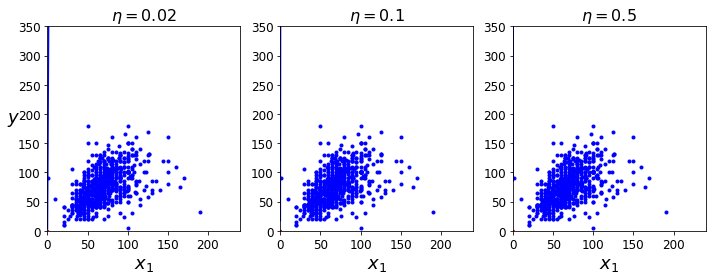

In [509]:
np.random.seed(42)
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

In [522]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([12, 7, 19, 3, 8, 23, 87, 71], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [517]:
np.random.seed(42)
theta = np.random.randn(2,1) 
theta

array([[ 0.49671415],
       [-0.1382643 ]])